# Deriving cancer gene's from expression data

See if it's possible to train a deep neural network tumor/normal binary classifier using just the Toil TCGA, TARGET and GTEX expression datasets:

https://xenabrowser.net/datapages/?host=https://toil.xenahubs.net)

In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
import plotly.plotly as py
import tensorflow as tf
import keras


/home/brad/anaconda3/envs/xenas/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6

/home/brad/anaconda3/envs/xenas/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


In [2]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# fix random seed for reproducibility
np.random.seed(42)

In [3]:
def printf(format, *values):
    print(format % values )

In [4]:
TBoard=keras.callbacks.TensorBoard(
    log_dir='/media/brad/hd1/logs/tensorboard/', 
    histogram_freq=0, 
    batch_size=32, 
    write_graph=True, 
    write_grads=True, 
    write_images=False, 
    embeddings_freq=0, 
    embeddings_layer_names=None, 
    embeddings_metadata=None)

In [5]:
#"""
#Detect if there are GPU's on this box and if so use them politely. If not use the CPU.
#"""
#import re
#import subprocess
#import keras.backend.tensorflow_backend
#
#
#if "CUDA_HOME" in os.environ:
#    # Pick a GPU that isn't being used and then only use the memory we need (allow_growth)
#    print("Using GPU")
#    def get_session():
#        return tf.Session(config=tf.ConfigProto(log_device_placement=True, allow_soft_placement=True,
#                                                gpu_options=tf.GPUOptions(allow_growth=True)))
#    keras.backend.tensorflow_backend.set_session(get_session())
#
#    utilization = re.findall(r"Utilization.*?Gpu.*?(\d+).*?Memory.*?(\d+)",
#                             subprocess.check_output(["nvidia-smi", "-q"]), 
#                             flags=re.MULTILINE | re.DOTALL)
#    print("GPU Utilization", utilization)
#
#    if ('0', '0') in utilization:
#        print("Using GPU Device:", utilization.index(('0', '0')))
#        os.environ["CUDA_VISIBLE_DEVICES"] = str(utilization.index(('0', '0')))
#        os.environ["CUDA_DEVICE_ORDER"]  = "PCI_BUS_ID"  # To ensure the index matches
#    else:
#        print("All GPUs in Use")
#        exit    
#else:
#    print("Using CPU")

In [6]:
from keras.utils.io_utils import HDF5Matrix
import h5py

input_file = "data/tumor_normal.h5"

with h5py.File(input_file, "r") as f:
    print("Datasets:", list(f.keys()))
    
# Use a subset of the data if debugging
#if os.getenv("DEBUG", "True") == "True":
#    X_train = HDF5Matrix(input_file, "X_train", start=0, end=1000)
#    X_test = HDF5Matrix(input_file, "X_test", start=0, end=200)
#    y_train = HDF5Matrix(input_file, "y_train", start=0, end=1000)
#    y_test = HDF5Matrix(input_file, "y_test", start=0, end=200)
#    print("Training on partial dataset")
#    epochs=1
#    batch_size=256
#else:

#warning this conversion to np arrays takes time
X_train = np.array( HDF5Matrix(input_file, "X_train"))
X_test  = np.array( HDF5Matrix(input_file, "X_test"))
y_train = np.array( HDF5Matrix(input_file, "y_train"))
y_test  = np.array( HDF5Matrix(input_file, "y_test"))
classes_test   = np.array( HDF5Matrix(input_file, "classes_test"))
classes_train  = np.array( HDF5Matrix(input_file, "classes_train"))
features       = np.array( HDF5Matrix(input_file, "features"))
genes          = np.array( HDF5Matrix(input_file, "genes"))
labels         = np.array( HDF5Matrix(input_file, "labels"))
class_labels   = np.array( HDF5Matrix(input_file, "class_labels"))


print("Training on full dataset")
epochs=8
batch_size=128
    
print("X_train.shape:", X_train.shape, "epochs:", epochs, "batch_size:", batch_size)
print("X_test.shape:", X_test.shape)

 

Datasets: ['X_test', 'X_train', 'class_labels', 'classes_test', 'classes_train', 'features', 'genes', 'labels', 'y_test', 'y_train']
Training on full dataset
X_train.shape: (15300, 60498) epochs: 8 batch_size: 128
X_test.shape: (3826, 60498)


X_sum.shape: (15300,) [-340050.44 -377311.47 -327989.78 ... -278530.94 -291752.8  -324333.53]


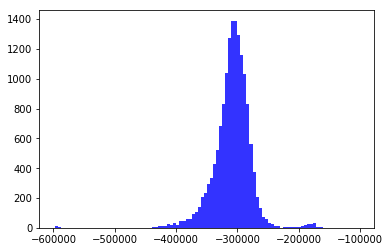

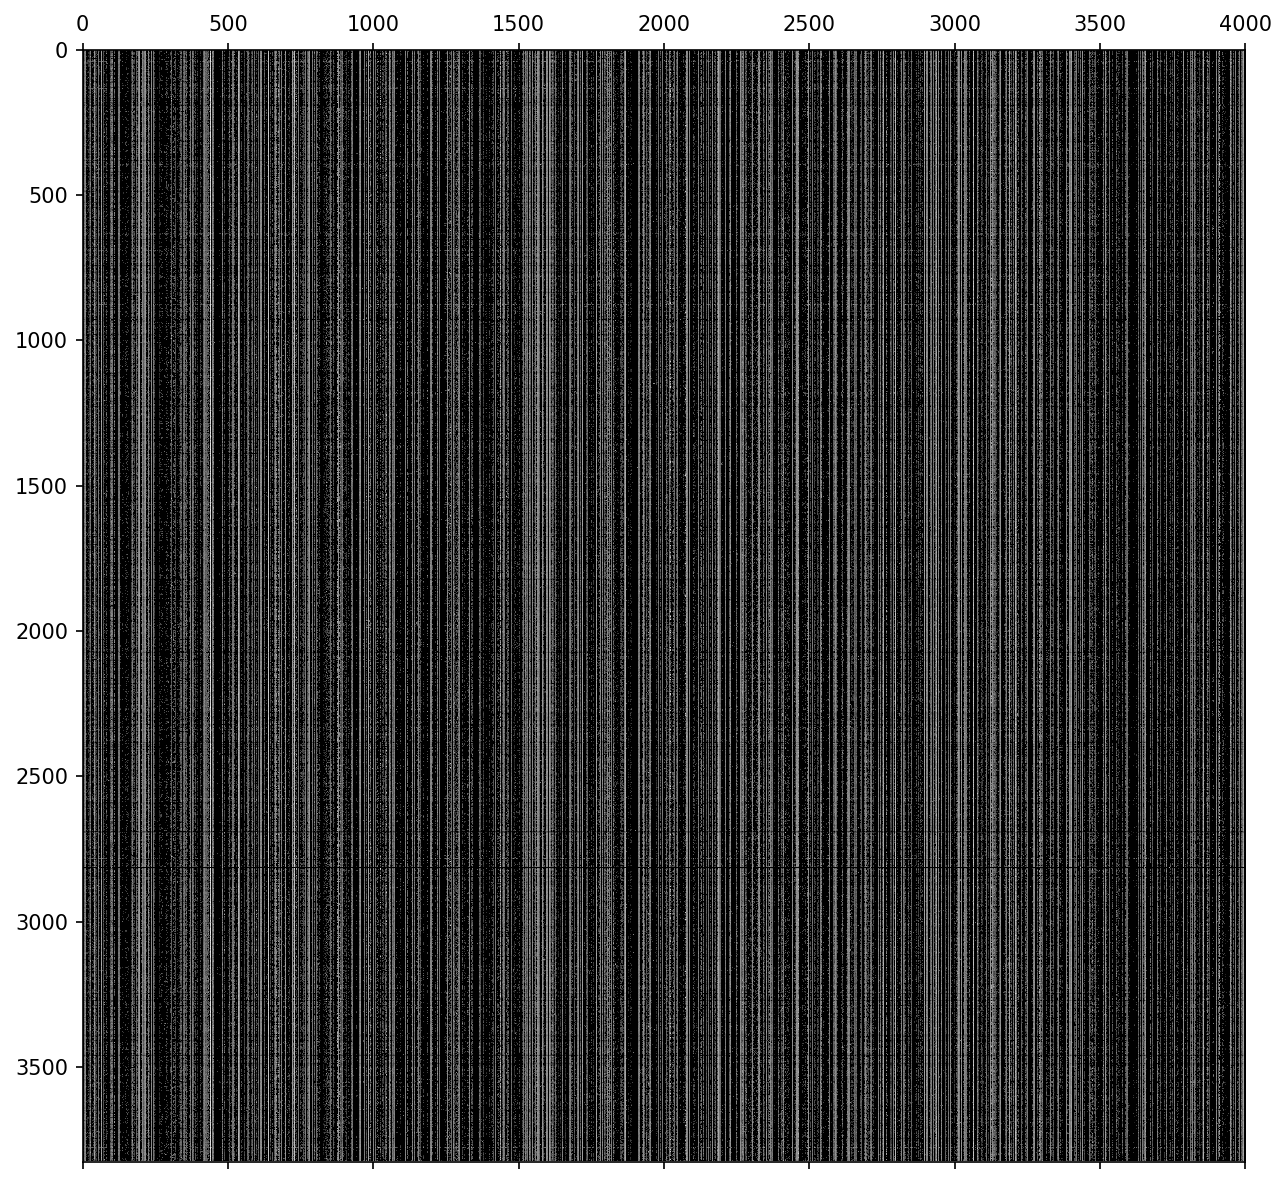

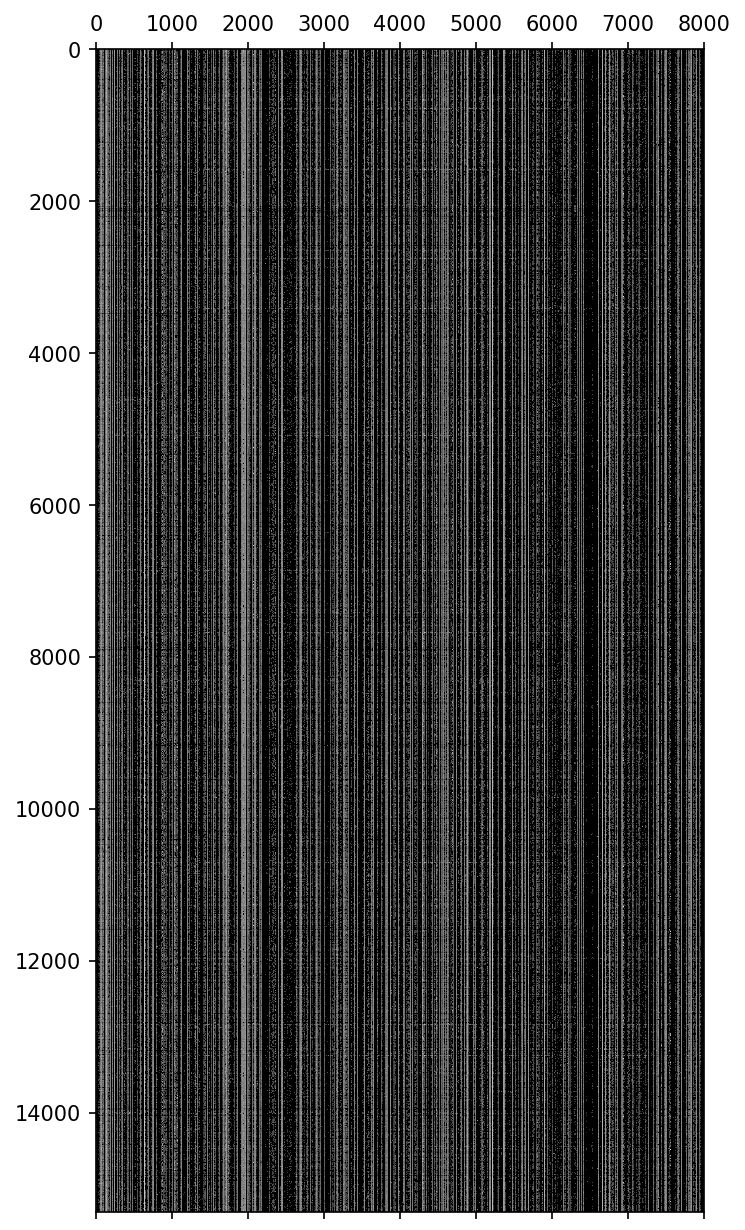

In [7]:
X_sum=np.sum(X_train, axis=1)
print("X_sum.shape:", X_sum.shape, X_sum)
n, bins, patches = plt.hist(X_sum, 100, facecolor='blue', alpha=0.8)
plt.show()
#for i in range(60498):
    #if X_sum[i] > 300000 and X_sum[i] >290000 : print("X_sum, i", X_sum[i], X_train[i])
#show the weights

plt.figure(num=1, dpi=150, frameon=1, figsize=(10, 10))
plt.matshow(X_test[:, 0:4000], fignum=1, cmap='gray')    



for i in range (1) :
    plt.figure(num=i+2, dpi=150, frameon=1, figsize=(10, 10))
#    plt.figure(figsize=(10, 10))

    plt.matshow(X_train[:, i*8000:i*8000+8000], fignum=i+2, cmap='gray')    
    #plt.matshow(X_train[0:1000,:8000], fignum=1, cmap='gray')
#plt.matshow(np.log(X_train[0:1000,0:]), fignum=2, cmap='jet')

    

In [8]:
Tclass_labels = np.concatenate((class_labels[:],class_labels[:]),axis=0)
print("classes_labels shape:", Tclass_labels.shape)
for i in range(92) :
    T= 'Normal'
    if i > 45: T='Tumor'
    printf("classes_label : %2.2d %s %s", i, T,  Tclass_labels[i])
 


classes_labels shape: (92, 1)
classes_label : 00 Normal [b'Adipose Ti']
classes_label : 01 Normal [b'Adrenal Gl']
classes_label : 02 Normal [b'Adrenal gl']
classes_label : 03 Normal [b'Bile duct']
classes_label : 04 Normal [b'Bladder']
classes_label : 05 Normal [b'Blood']
classes_label : 06 Normal [b'Blood Vess']
classes_label : 07 Normal [b'Bone Marro']
classes_label : 08 Normal [b'Brain']
classes_label : 09 Normal [b'Breast']
classes_label : 10 Normal [b'Cervix']
classes_label : 11 Normal [b'Cervix Ute']
classes_label : 12 Normal [b'Colon']
classes_label : 13 Normal [b'Endometriu']
classes_label : 14 Normal [b'Esophagus']
classes_label : 15 Normal [b'Eye']
classes_label : 16 Normal [b'Fallopian ']
classes_label : 17 Normal [b'Head and N']
classes_label : 18 Normal [b'Heart']
classes_label : 19 Normal [b'Kidney']
classes_label : 20 Normal [b'Lining of ']
classes_label : 21 Normal [b'Liver']
classes_label : 22 Normal [b'Lung']
classes_label : 23 Normal [b'Lymphatic ']
classes_label : 2

train classes


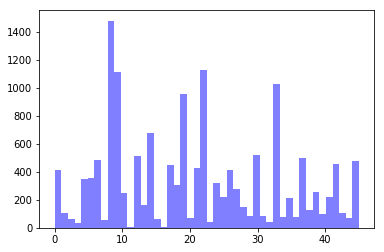

test classes


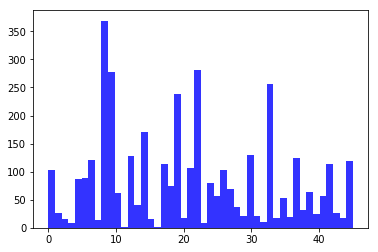

In [9]:
#Histogram
num_bins = 46
print('train classes')
n, bins, patches = plt.hist(classes_train, num_bins, facecolor='blue', alpha=0.5)
plt.show()

print('test classes')

n, bins, patches = plt.hist(classes_test, num_bins, facecolor='blue', alpha=0.8)
plt.show()

In [10]:
print("classes_test.shape:", classes_test.shape)
print("classes_train.shape:", classes_train.shape)
print("features.shape:", features.shape, features[0:10])
print("genes.shape:", genes.shape, genes[0:10])
print("labels.shape:", labels.shape, labels)
print("classes :", classes_train[0:100] )

Classes_train = keras.utils.to_categorical(classes_train, 46)
Classes_test  = keras.utils.to_categorical(classes_test,  46)

print("Classes :", Classes_train.shape )
class_labels.shape



classes_test.shape: (3826,)
classes_train.shape: (15300,)
features.shape: (60498,) [b'ENSG000002' b'ENSG000002' b'ENSG000002' b'ENSG000001' b'ENSG000002'
 b'ENSG000000' b'ENSG000002' b'ENSG000002' b'ENSG000001' b'ENSG000001']
genes.shape: (60498,) [b'RP11-368I2' b'RP11-167B3' b'RP11-742D1' b'RAB4B' b'AC104071.1' b'TIGAR'
 b'LINC01224' b'MIR4802' b'RNF44' b'DNAH3']
labels.shape: (2, 1) [[b'Normal']
 [b'Tumor']]
classes : [ 8  5 37 20  0 19  9 39 26  0 19 19 35  5 33  9 22  8  0 10 22  8  8  8
 26 21 12 21  0  9 35  4  9 22  9 19 22 35 24 22  6 27  5 25 30 41  9  8
  9 22  8 33  5  5 19  0  6 26  0 28 22  9  7 14 34  6 19 21  8 22 30  6
  9 21 39 21 33 23 10  9  8 37  8 33  9 33  8 14 13  6 25 33 22 19 19 10
  8 14 33 18]
Classes : (15300, 46)


(46, 1)

In [11]:
"""
Expand tissue type classes from 46 to 92 by including tumor status.
"""

print("y_test.shape:", y_test.shape, y_test[0:10], classes_test[0:10])
yt=y_test[:]
Yt=Classes_test[:]
yall0=Yt*               yt[:,np.newaxis]
yall1=Yt*np.logical_not(yt[:,np.newaxis])
Tclasses_test=np.concatenate((yall1, yall0), axis=1)
print("Tclasses_test.shape:", Tclasses_test.shape)
print("Tclasses_test:\n", Tclasses_test[7,:])

print("y_train.shape:", y_train.shape, y_train[0:10], classes_train[0:10])
yt=y_train[:]
Yt=Classes_train[:]
yall0=Yt*               yt[:,np.newaxis]
yall1=Yt*np.logical_not(yt[:,np.newaxis])
Tclasses_train=np.concatenate((yall1, yall0), axis=1)
print("Tclasses_train.shape:", Tclasses_train.shape)
print("Tclasses_train:\n", Tclasses_train[2,:])

from sklearn.utils import class_weight
sample_weights = class_weight.compute_sample_weight('balanced', classes_train[:]+46*y_train[:])

sample_weights[1:100]
#sample_weights.shape

y_test.shape: (3826,) [0 0 0 1 0 1 0 1 1 0] [33 41 24 33 22 19 14 30  4 31]
Tclasses_test.shape: (3826, 92)
Tclasses_test:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train.shape: (15300,) [0 0 1 1 0 1 1 0 1 0] [ 8  5 37 20  0 19  9 39 26  0]
Tclasses_train.shape: (15300, 92)
Tclasses_train:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


array([0.61569416, 0.66033664, 3.12244898, 0.53051318, 0.26785714,
       0.24697337, 1.72103487, 0.63909774, 0.53051318, 0.26785714,
       0.26785714, 1.04579631, 0.61569416, 0.58914132, 0.24697337,
       0.26950854, 0.23757764, 0.53051318, 0.89578454, 0.26950854,
       0.39240831, 0.23757764, 0.23757764, 0.63909774, 1.72103487,
       0.76961771, 0.73346117, 0.53051318, 0.24697337, 1.04579631,
       0.67460317, 0.24697337, 0.26950854, 0.24697337, 0.26785714,
       0.26950854, 1.04579631, 0.68949977, 0.26950854, 0.45066274,
       1.59541189, 0.61569416, 0.98455598, 0.56043956, 0.98014094,
       0.24697337, 0.23757764, 0.24697337, 0.26950854, 0.23757764,
       0.33420708, 0.61569416, 0.61569416, 0.26785714, 0.53051318,
       0.45066274, 0.63909774, 0.53051318, 1.50738916, 0.68949977,
       0.24697337, 3.90306122, 0.40854473, 2.95366795, 0.45066274,
       0.26785714, 0.73346117, 0.23757764, 0.26950854, 0.56043956,
       0.45066274, 0.24697337, 1.72103487, 1.72103487, 0.73346

In [12]:
"""
Apply e^x to remove log 
"""
#eX_train=np.exp(X_train)
#eX_test =np.exp(X_test)



'\nApply e^x to remove log \n'

In [13]:
if(0):
    hist=np.zeros(92)
    class_weight=np.zeros(92)
    
    for i in range(92) :
        nc    = np.sum(Tclasses_test[ :,i] )  
        if(nc==0): class_weight[i]=0
        if(nc> 0): class_weight[i]=1000/nc
        hist[i]  = nc;  
    plt.bar( range(92),  class_weight)


#model.fit(X_train, Tclasses_train, epochs=20, batch_size=256, shuffle="true",class_weight = class_weight, validation_data=(X_test, Tclasses_test))


In [14]:
#class_weight=np.zeros(92)
#class_weight[0:46]=1

In [15]:
"""
Batch normalization with a sparse layer.

Achieves on Test:
3744/3826 [============================>.] - ETA: 0s(['loss', 'acc'], [0.52888519396363787, 0.89388395178336721])
"""
import keras
from keras.models import Model, Sequential
from keras.layers import InputLayer, Dense, BatchNormalization, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
from keras import regularizers

opt = keras.optimizers.rmsprop(lr=0.000001, decay=1e-6)
sample_weights = class_weight.compute_sample_weight('balanced', classes_train[:]+46*y_train[:])


classify = [
    InputLayer(input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    
#    Dense(100,kernel_regularizer=regularizers.l1(0.001)),
#    BatchNormalization(),
#    Dropout(.3),
#    Activation('selu'),
#
#    Dense(100, kernel_regularizer=regularizers.l1(0.001)),
#    BatchNormalization(),
#    Dropout(.1),
#    Activation('selu'),

 #   Dense(120, kernel_regularizer=regularizers.l1(0.001)),
 #   BatchNormalization(),
 #   Dropout(.5),
 #   Activation('relu'),

#    Dense(500),
#    BatchNormalization(),
#    Dropout(.8),
#    Activation('selu'),

#    Dense(200),
#     BatchNormalization(),
#    Dropout(.5),
#    Activation('selu'),

#    Dense(100),
#     BatchNormalization(),
#    Dropout(.8),
#    Activation('relu'),
#
#    Dense(100),
#     BatchNormalization(),
#    Dropout(.8),
#    Activation('relu'),

    
#    Dense(500, activity_regularizer=regularizers.l1(.0001)),
#    BatchNormalization(),
#    Dropout(.8),
#    Activation('selu'),
    
     Dense(92, activity_regularizer=regularizers.l1(0.0001)),
#    BatchNormalization(),
#     Dense(48),
     Activation('softmax')
 #   Activation('sigmoid')
]

model = Sequential(classify)

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#model.compile(loss='mean_absolute_percentage_error', optimizer=opt, metrics=['accuracy']) #66.6
model.compile(loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy']) #69
#model.compile(loss='cosine_proximity', optimizer=opt, metrics=['accuracy']) #<

callbacks=[
    #EarlyStopping(monitor='acc', min_delta=0.05, patience=2, verbose=2, mode="max"), 
    TBoard ]

#model.fit(X_train, y_train, epochs=epochs, batch_size=32, shuffle="batch", callbacks=callbacks, validation_data=(X_test, y_test))
model.fit(X_train, Tclasses_train, epochs=10, batch_size=128, shuffle="true", sample_weight = sample_weights, callbacks=callbacks, validation_data=(X_test, Tclasses_test))
#model.fit(eX_train, Tclasses_train, epochs=epochs, batch_size=128, shuffle="true", callbacks=callbacks, validation_data=(eX_test, Tclasses_test))



#print(model.metrics_names, model.evaluate(X_test, y_test))

Train on 15300 samples, validate on 3826 samples
Epoch 1/10
15300/15300 [==============================] - 2s 162us/step - loss: 6.0012 - acc: 0.0406 - val_loss: 5.5187 - val_acc: 0.0800
Epoch 2/10
15300/15300 [==============================] - 2s 152us/step - loss: 5.4853 - acc: 0.1009 - val_loss: 5.0005 - val_acc: 0.1576
Epoch 3/10
15300/15300 [==============================] - 2s 157us/step - loss: 5.1841 - acc: 0.1631 - val_loss: 4.6576 - val_acc: 0.2373
Epoch 4/10
15300/15300 [==============================] - 2s 158us/step - loss: 4.9667 - acc: 0.2146 - val_loss: 4.4128 - val_acc: 0.2974
Epoch 5/10
15300/15300 [==============================] - 2s 158us/step - loss: 4.7961 - acc: 0.2538 - val_loss: 4.2206 - val_acc: 0.3461
Epoch 6/10
15300/15300 [==============================] - 2s 156us/step - loss: 4.6611 - acc: 0.2863 - val_loss: 4.0724 - val_acc: 0.3868
Epoch 7/10
15300/15300 [==============================] - 2s 154us/step - loss: 4.5603 - acc: 0.3086 - val_loss: 3.9575 - v

In [16]:
sample_weights = class_weight.compute_sample_weight('balanced', classes_train[:]+46*y_train[:])

model.fit(X_train, Tclasses_train, epochs=20, batch_size=256, shuffle="true",sample_weight = sample_weights,validation_data=(X_test, Tclasses_test))
#print(model.metrics_names, model.evaluate(X_test, y_test))


Train on 15300 samples, validate on 3826 samples
Epoch 1/20
15300/15300 [==============================] - 2s 131us/step - loss: 5.3072 - acc: 0.3592 - val_loss: 4.7907 - val_acc: 0.4723
Epoch 2/20
15300/15300 [==============================] - 2s 131us/step - loss: 5.2436 - acc: 0.3590 - val_loss: 4.7634 - val_acc: 0.4723
Epoch 3/20
15300/15300 [==============================] - 2s 131us/step - loss: 5.1877 - acc: 0.3621 - val_loss: 4.7328 - val_acc: 0.4770
Epoch 4/20
15300/15300 [==============================] - 2s 132us/step - loss: 5.1338 - acc: 0.3693 - val_loss: 4.7050 - val_acc: 0.4796
Epoch 5/20
15300/15300 [==============================] - 2s 131us/step - loss: 5.0918 - acc: 0.3703 - val_loss: 4.6746 - val_acc: 0.4854
Epoch 6/20
15300/15300 [==============================] - 2s 131us/step - loss: 5.0426 - acc: 0.3757 - val_loss: 4.6504 - val_acc: 0.4885
Epoch 7/20
15300/15300 [==============================] - 2s 135us/step - loss: 4.9982 - acc: 0.3785 - val_loss: 4.6217 - v

In [17]:
def RNA_mix(mix, naug):
    
    print( X_train.shape[0] )
    samples=X_train.shape[0]
    for i in range(naug) :
        i0 = np.random.randint(samples)
        i1 = np.random.randint(samples)
        Xmix0 = X_train[i0,:] *mix 
        Xmix1 = X_train[i1,:] *(1-mix)
        
        #print(i0,i1 )
        #print(X_train[i0, 0:5] )
        #print(X_train[i1, 0:5] )
        #print(Xmix0[0:5] )
        #print(Xmix1[0:5] )
        X_aug[i,:]=Xmix0+Xmix1
        Y_aug[i,:]=Tclasses_train[i0,:]
        Y_augc[i] = classes_train[i0]+46*y_train[i0]
        
naug=5000
X_aug=np.zeros((naug,X_train.shape[1]))
Y_aug=np.zeros((naug,Tclasses_train.shape[1]))
Y_augc=np.zeros((naug))
X_aug_test=X_test

#RNA_mix(.4, naug)  

#print(X_aug[0,1:5] )
#print(Y_aug[0,:] )
for k in range(3):
    sample_weights = class_weight.compute_sample_weight('balanced', Y_augc)
    for i in range(20):
        RNA_mix(.5, naug)   
        model.fit(X_aug, Y_aug, epochs=1, batch_size=128, shuffle="true",sample_weight = sample_weights,validation_data=(X_aug_test, Tclasses_test))

    sample_weights = class_weight.compute_sample_weight('balanced', classes_train[:]+46*y_train[:])
    model.fit(X_train, Tclasses_train, epochs=3, batch_size=256, shuffle="true",sample_weight = sample_weights,validation_data=(X_test, Tclasses_test))



15300
Train on 5000 samples, validate on 3826 samples
Epoch 1/1
5000/5000 [==============================] - 2s 302us/step - loss: 4.4134 - acc: 0.2654 - val_loss: 3.3514 - val_acc: 0.5413
15300
Train on 5000 samples, validate on 3826 samples
Epoch 1/1
5000/5000 [==============================] - 2s 301us/step - loss: 4.3658 - acc: 0.2786 - val_loss: 3.3430 - val_acc: 0.5523
15300
Train on 5000 samples, validate on 3826 samples
Epoch 1/1
5000/5000 [==============================] - 2s 310us/step - loss: 4.3475 - acc: 0.2720 - val_loss: 3.3507 - val_acc: 0.5656
15300
Train on 5000 samples, validate on 3826 samples
Epoch 1/1
5000/5000 [==============================] - 2s 305us/step - loss: 4.3021 - acc: 0.2868 - val_loss: 3.3482 - val_acc: 0.5763
15300
Train on 5000 samples, validate on 3826 samples
Epoch 1/1
5000/5000 [==============================] - 2s 302us/step - loss: 4.3209 - acc: 0.2750 - val_loss: 3.3457 - val_acc: 0.5834
15300
Train on 5000 samples, validate on 3826 samples
E

Epoch 2/3
15300/15300 [==============================] - 2s 132us/step - loss: 4.3715 - acc: 0.4803 - val_loss: 4.1359 - val_acc: 0.6124
Epoch 3/3
15300/15300 [==============================] - 2s 129us/step - loss: 4.3178 - acc: 0.4739 - val_loss: 4.1293 - val_acc: 0.6004
15300
Train on 5000 samples, validate on 3826 samples
Epoch 1/1
5000/5000 [==============================] - 2s 301us/step - loss: 4.1705 - acc: 0.2956 - val_loss: 3.1103 - val_acc: 0.6074
15300
Train on 5000 samples, validate on 3826 samples
Epoch 1/1
5000/5000 [==============================] - 2s 303us/step - loss: 4.0941 - acc: 0.3170 - val_loss: 3.1206 - val_acc: 0.6100
15300
Train on 5000 samples, validate on 3826 samples
Epoch 1/1
5000/5000 [==============================] - 2s 300us/step - loss: 4.2677 - acc: 0.3038 - val_loss: 3.1413 - val_acc: 0.6147
15300
Train on 5000 samples, validate on 3826 samples
Epoch 1/1
5000/5000 [==============================] - 2s 301us/step - loss: 4.1966 - acc: 0.3012 - val_l

In [18]:
print(model.evaluate(X_test, Tclasses_test))
classes_pred=model.predict_classes( X_test)

print()
print(Tclasses_test[0:30,:])
print(classes_pred  [0:30])
print(classes_test[0:30]+46*y_test[0:30])


3826/3826 [==============================] - 1s 153us/step
[2.3344119379050556, 0.6074228960683815]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[33 41 24 50 22 81 57 74 56 91  1 89 38  8 41 41 68 55 74 63 74 41 55  8
 55 14 42  6 58 55]
[33 41 24 79 22 65 14 76 50 31  1 69 81  8 88 41 68 55 74 63 83 41 58  8
 55 14 76  6 88 55]


In [19]:
print(model.evaluate(X_train, Tclasses_train))
classes_pred=model.predict_classes( X_train)

print()
print(Tclasses_train[0:10,:])
print(classes_pred  [0:10])
print(classes_train[0:10]+46*y_train[0:10])
#print(class_id[0:10])

15300/15300 [==============================] - 2s 153us/step
[2.688030698439654, 0.48764705882352943]

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [20]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True) # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook

In [21]:
##show the weights
#x=model.get_weights()
#w1=x[0]
##w1=reg_path
#print("w1", w1.shape)
#plt.matshow(w1[0:1000,0:1000], fignum=1, cmap='gray')
#plt.matshow(-np.log(w1[0:1000,0:1000]), fignum=2, cmap='jet')

classes_pred.shape: (3826,) (3826,) 91
pred [41 24 50 22 81 57 74 56 91  1 89 38  8 41 41 68 55 74 63]
test [41 24 33 22 19 14 30  4 31  1 23 35  8 42 41 22  9 28 17]


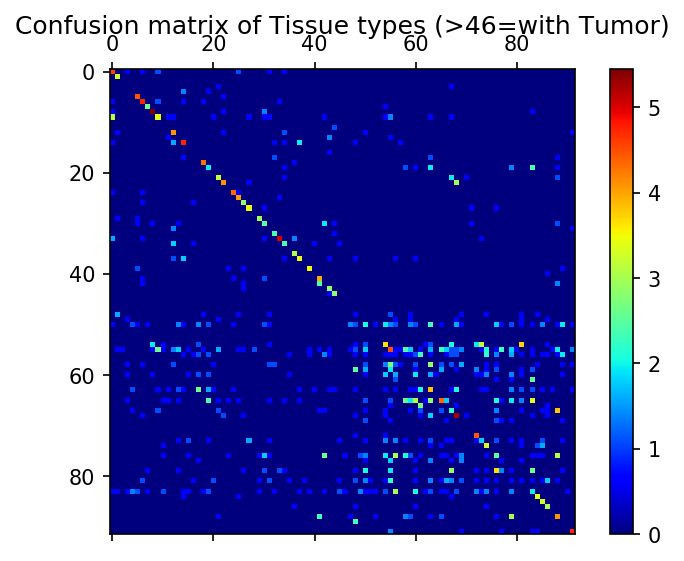

test classes in


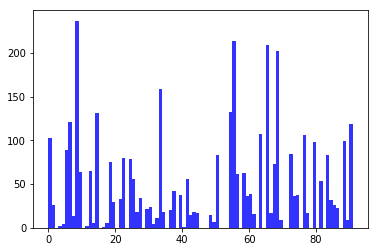

test classes out
test classes ratio


array([103.,  26.,   0.,   2.,   4.,  89., 121.,  14., 237.,  64.,   0.,
         2.,  65.,   5., 131.,   0.,   1.,   6.,  75.,  30.,   0.,  33.,
        80.,   0.,  79.,  56.,  18.,  34.,   0.,  21.,  24.,   4.,  11.,
       159.,  18.,   0.,  20.,  42.,   0.,  38.,   1.,  56.,  15.,  18.,
        17.,   0.,   0.,   0.,  15.,   7.,  83.,   0.,   0.,   0., 132.,
       214.,  62.,   0.,  63.,  36.,  39.,  16.,   0., 107.,   0., 209.,
        17.,  73., 202.,   9.,   0.,   0.,  85.,  36.,  37.,   0., 106.,
        17.,   0.,  98.,   0.,  53.,   0.,  83.,  32.,  26.,  23.,   0.,
        99.,   9.,   0., 119.])

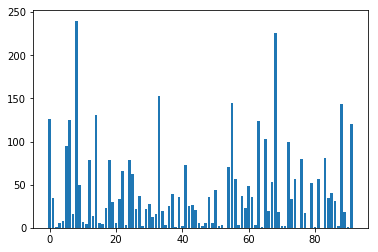

In [22]:
from sklearn.metrics import confusion_matrix
#y_true = [2, 0, 2, 2, 0, 1]
#y_pred = [0, 0, 2, 2, 0, 2]
classes_pred=model.predict_classes( X_test)



print("classes_pred.shape:", classes_pred.shape,  classes_test.shape, classes_pred.max())
#confusion_matrix(y_true, y_pred)
print("pred", classes_pred[1:20])
print("test", classes_test[1:20])

cm = confusion_matrix(classes_test[:]+46*y_test[:], classes_pred[:], labels=np.arange(92))

plt.figure(num=1, dpi=150, frameon=1)

plt.matshow(np.log(cm+1), fignum=1, cmap='jet')
#plt.matshow(np.eye(96), fignum=1, cmap='jet')
plt.title('Confusion matrix of Tissue types (>46=with Tumor)')
plt.colorbar()
plt.show()

cm.shape

print('test classes in')

n, bins, patches = plt.hist(classes_test[:]+46*y_test[:], 91, facecolor='blue', alpha=0.8)
plt.show()
cm[0:10,0:10]

print('test classes out')

histc_out=np.zeros(92)
histr_out=np.zeros(92)

for col in range(92) :
    histc_out[col]    = np.sum(cm[ 0:92,col] )  
plt.bar( range(92), histc_out)
histc_out[:]

#for row in range(92) :
#    histr_out[row]    = np.sum(cm[row, 0:92] )  
#plt.bar( range(92, 184), histr_out)

print('test classes ratio')
for row in range(92) :
    histr_out[row]    = np.sum(cm[row, 0:92] )  

#    plt.bar( range(92), histr_out/histc_out)

histr_out[:]

In [23]:
#display confusion matrix

# use log
lcm=np.log(cm+1)

#This took a while to figure out
labels =[      bytes(Tclass_labels[i]).decode('utf8').replace('\x00', '') for i in range(46)]
labels+=['T_'+ bytes(Tclass_labels[i]).decode('utf8').replace('\x00', '') for i in range(46)]

cmax=np.amax(cm)
print('cmax', cmax, type(cm))

cmn=cm*1.001;

print('histr', histr_out.shape, histr_out)


#normalize across rows
for row in range(92) :
    for col in range(92) :
#        print(row,col,cm[row,col],rmax[row])
        if(histr_out[row]==0): break
        cmn[row,col] =cm[row,col]/histr_out[row]

print('cmn', cmn.shape, cmn)
pi=np.random.permutation(92)
print('pi\n', pi)
cmp=cmn[:,pi]
cmp=cmp[pi,:]

#labels_permuted=[labels[pi[i]] for i in range(92)]
labels_permuted= labels


trace = go.Heatmap(
    z=cmp,
    x=labels_permuted,
    y=labels_permuted,
    ygap=0,
    xgap=0,
    colorscale=[
        [0.0,     'rgb(  0, 30,100)'], 
        [0.01,  'rgb( 50, 50, 150)'], 
        [0.02,  'rgb( 50,100, 200)'], 
        [0.04,  'rgb(100,100, 150)'], 
#        [4/cmax,  'rgb(255,150,144)'], 
#        [5/cmax,  'rgb(255,150,248)'], 
#        [10/cmax, 'rgb(100,250,233)'], 
        [0.1, 'rgb(250,100,100)'], 
        [0.5, 'rgb(200,250,200)'], 
        [1.0,     'rgb(255,250,255)']]
 

)
data=[trace]


layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=150,
        r=100,
        b=150,
        t=100,
        pad=4
    ),
    paper_bgcolor='#ffffff',
    plot_bgcolor='#000000' ,
    title='Confusion Matrix',
    xaxis=dict(
        title='Predicted',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#000000'
        )
    ),
    yaxis=dict(
        title='Actual',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#000000'
        )
    )


)
fig = go.Figure(data=data, layout=layout)
#plot_url = plot(fig, filename='confusion-matrix.html')

#print(data)
iplot(data, filename='confusion matrix')
#print(labels, len(labels))

cmax 231 <class 'numpy.ndarray'>
histr (92,) [103.  26.   0.   2.   4.  89. 121.  14. 237.  64.   0.   2.  65.   5.
 131.   0.   1.   6.  75.  30.   0.  33.  80.   0.  79.  56.  18.  34.
   0.  21.  24.   4.  11. 159.  18.   0.  20.  42.   0.  38.   1.  56.
  15.  18.  17.   0.   0.   0.  15.   7.  83.   0.   0.   0. 132. 214.
  62.   0.  63.  36.  39.  16.   0. 107.   0. 209.  17.  73. 202.   9.
   0.   0.  85.  36.  37.   0. 106.  17.   0.  98.   0.  53.   0.  83.
  32.  26.  23.   0.  99.   9.   0. 119.]
cmn (92, 92) [[0.9223301  0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.94117647]]
pi
 [18 71 68 54 75  4  1 89 1

/home/brad/anaconda3/envs/xenas/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



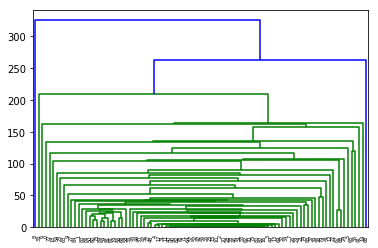

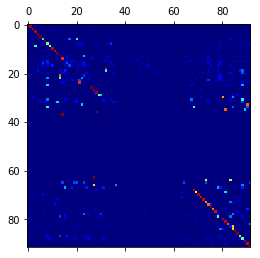

In [24]:
# reorder matrix so similar rows are next to each other
from scipy.cluster.hierarchy import dendrogram, linkage

#w2=w1[0:300,0:200]
Z = linkage(cm, method='ward', optimal_ordering=True)
#fig = plt.figure(figsize=(30, 20))
dn = dendrogram(Z)
#print('Z=', Z.shape,'\n', Z)
#print(dn['leaves'])
#print(dn['ivl'])
#print('labels', labels)


leaf_order=dn['leaves']
cmp=cmn[leaf_order,:] 
cmo=cmp[:,leaf_order] 

labels_permuted=[labels[leaf_order[i]] for i in range(92)]

#plt.matshow(cm, fignum=2, cmap='gray')
plt.matshow(np.log(cm+1), fignum=3, cmap='jet')
plt.matshow(np.log(cmo+1), fignum=3, cmap='jet')




In [25]:
#Show the reordered matrix in an html page using plotly

trace = go.Heatmap(
    z=cmo,
    x=labels_permuted,
    y=labels_permuted,
    ygap=1,
    xgap=1,
    colorscale=[
        [0.0,     'rgb(  0, 30,100)'], 
        [0.01,  'rgb( 50, 50, 150)'], 
        [0.02,  'rgb( 50,100, 200)'], 
        [0.04,  'rgb(100,100, 150)'], 
#        [4/cmax,  'rgb(255,150,144)'], 
#        [5/cmax,  'rgb(255,150,248)'], 
#        [10/cmax, 'rgb(100,250,233)'], 
        [0.1, 'rgb(250,100,100)'], 
        [0.5, 'rgb(200,200,200)'], 
        [1.0,     'rgb(255,250,255)']]
 

)
data=[trace]


layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=150,
        r=100,
        b=150,
        t=100,
        pad=4
    ),
    paper_bgcolor='#ffffff',
    plot_bgcolor='#000000' ,
    title='Confusion Matrix',
    xaxis=dict(
        title='Predicted',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#000000'
        ),
        showticklabels=True,
        tickangle=90,# reorder matrix so similar rows are next to each other
        tickfont=dict(
 
            family='Old Standard TT, serif',
            size=6,
            color='black'
        ),
    ),
    yaxis=dict(
        title='Actual',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#000000'
        ),
        showticklabels=True,
        tickangle=0,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=6,
            color='black'
        ),
    ),
)


fig = go.Figure(data=data, layout=layout)

plot_url = plot(fig, filename='confusion-matrix.html')


In [26]:
model.summary()

if(1):
    x=model.get_weights()

    
    #x=get_weights()
    print("\n weight list" )
    for i in range(2) :
        print("weight", i, x[i].shape, x[i] )
    print("layers=", model.layers)
    print("inputs=", model.inputs)
    print("outputs=", model.outputs)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 60498)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 60498)             241992    
_________________________________________________________________
dense_1 (Dense)              (None, 92)                5565908   
_________________________________________________________________
activation_1 (Activation)    (None, 92)                0         
Total params: 5,807,900
Trainable params: 5,686,904
Non-trainable params: 120,996
_________________________________________________________________

 weight list
weight 0 (60498,) [1.0003446  0.99944603 0.99947906 ... 1.0002795  1.0014411  0.9994896 ]
weight 1 (60498,) [ 0.00018583 -0.00106329 -0.0003079  ...  0.00229461  0.00184397
 -0.00031803]
layers= [<keras.engine.topology.InputLayer object at 0x7f

In [27]:
w=model.layers[2].get_weights()
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    #print(weights)
    
print(type(w[0]), type(w[1]), w[0].shape, w[1].shape)


<class 'numpy.ndarray'> <class 'numpy.ndarray'> (60498, 92) (92,)


/home/brad/anaconda3/envs/xenas/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in log



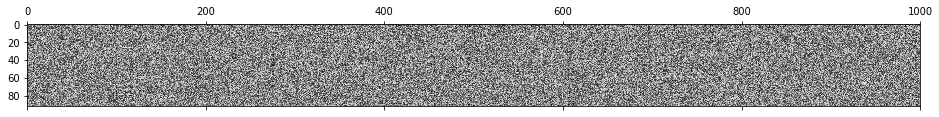

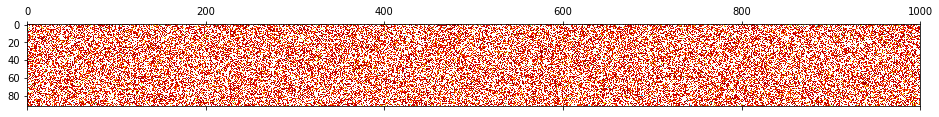

In [28]:
#show the weights

w0=w[0]
plt.matshow(w0[0:1000,:].T, fignum=1, cmap='gray')
plt.matshow(np.log(w0[0:1000,0:].T), fignum=2, cmap='jet')


(15300, 60498)
X_sum.shape: (15300, 60498) [-5.6208544 -6.236759  -5.421498  ... -4.6039696 -4.82252   -5.361062 ]


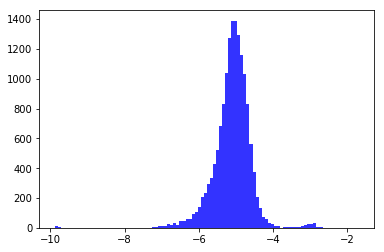

s= 0
-9.9658 18.985
0.0 1.0


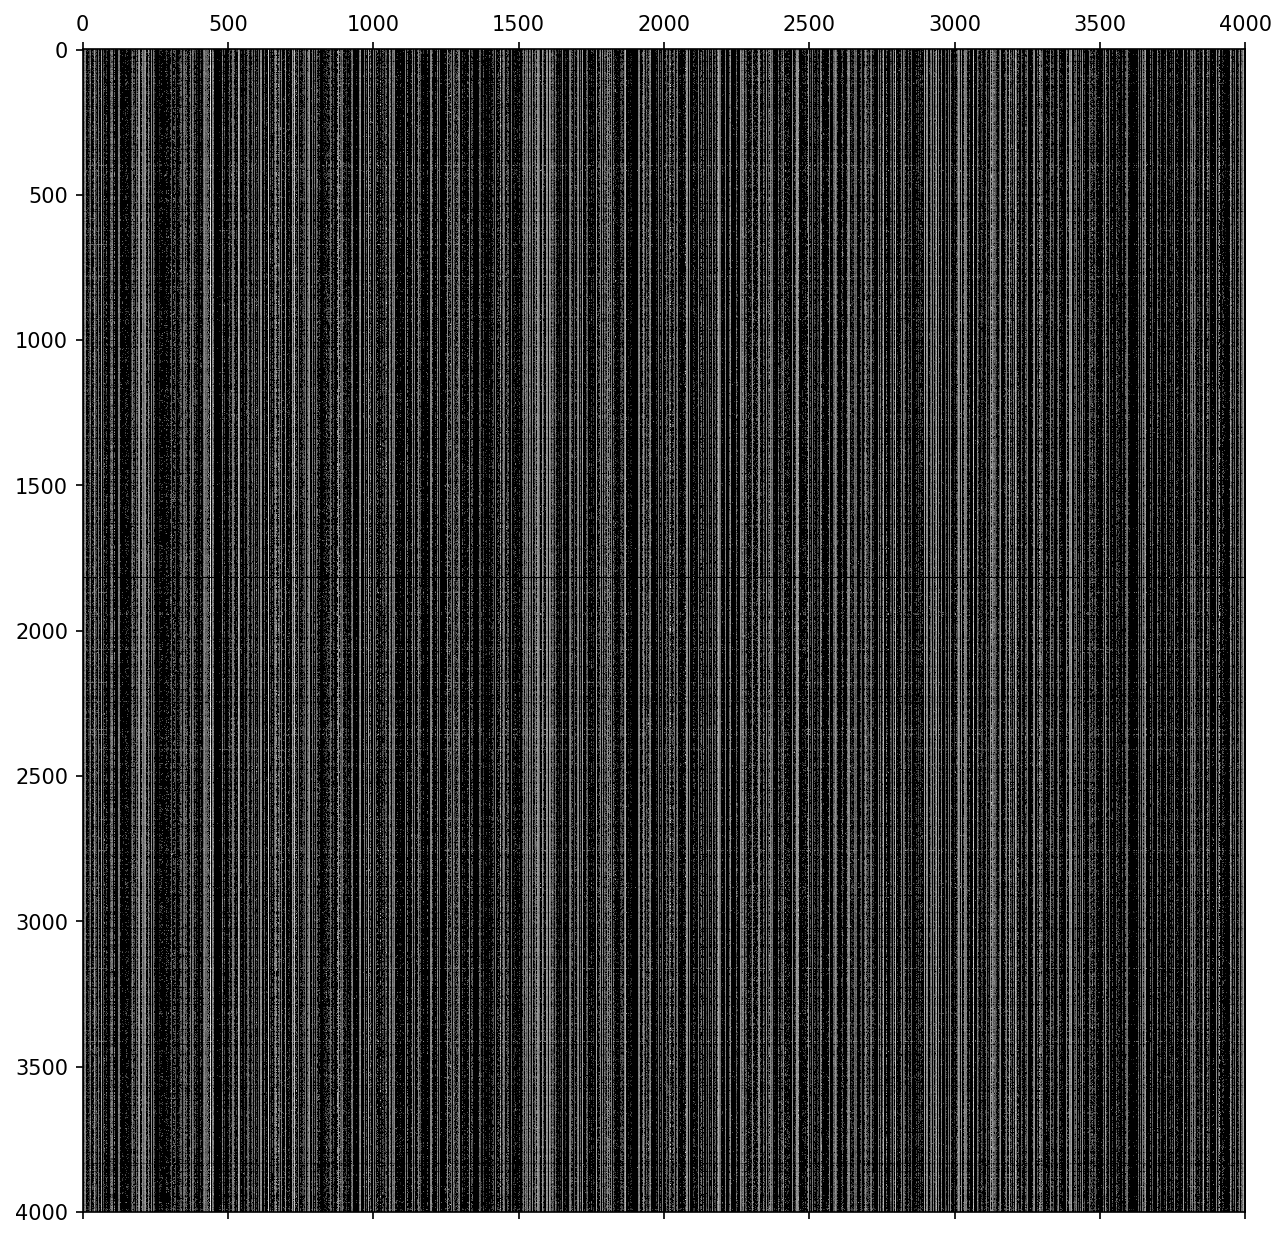

In [53]:
import matplotlib.pyplot as plt


x1=X_train[0:, 0:]
print(x1.shape)


xavg=np.average(x1, axis=1)
print("X_sum.shape:", x1.shape, xavg)
n, bins, patches = plt.hist(xavg, 100, facecolor='blue', alpha=0.8)
plt.show()
#for i in range(60498):
    #if X_sum[i] > 300000 and X_sum[i] >290000 : print("X_sum, i", X_sum[i], X_train[i])
#show the weights


for i in range (1) :
    print('s=', i*4000)
    plt.figure(num=i+1, dpi=150, frameon=1, figsize=(10, 10))
#    plt.figure(figsize=(10, 10))

    plt.matshow(x1[0:4000, i*4000:i*4000+4000], fignum=i+1, cmap='gray')    
    #plt.matshow(X_train[0:1000,:8000], fignum=1, cmap='gray')
#plt.matshow(np.log(X_train[0:1000,0:]), fignum=2, cmap='jet')




smax=np.amax(x1[0:, 0:])
smin=np.amin(x1[:,:])
print(smin, smax)

x2 =(x1-smin)/(smax-smin)
smax=np.amax(x2[0:, 0:])
smin=np.amin(x2[:,:])
print(smin, smax)

x1=0
x2=0

In [124]:
# Plot the raw input data as a heatmap 
# select rows and reorder matrix so similar rows and cols are next to each other


from scipy.cluster.hierarchy import dendrogram, linkage

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#method='single' #fast (causes recursion bug in dendrogram??)
#method='complete' # very slow
#method='average' #fast
#method='weighted' #fast
method='centroid' #fast
#method='median' #fast
#method='ward' #slow


# sort and select parameters
o_samples = 0000  # row start in data 
n_samples = 1000  # number of rows
n_rna     = 1000  # number of rnaseqs
o_rna     = 0     # rnaseq sstart in data
visualize = 'RNA'
sample_mask  = True
random_rnas  = True
sortrow    = True
sortcol    = True
showtest   = False
showtrain  = not showtest

# select classes to sort
class_sort  = list(range(0,92))
#class_sort  = [0:7, 46+0:46+7]
#class_sort  = [22,23]

n_classes    = len(class_sort)
printf('Select the following %d classes to sort %s:',n_classes, class_sort)



Select the following 92 classes to sort [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]:


In [125]:
# get predicted and actual classes and data sizes
if(showtrain==True) :
    #print('Show Training Results')
    classes_pred  = model.predict_classes( X_train)
    classes_id    = classes_train[:]+46*y_train[:]
    t_rna     = X_train.shape[1] 
    t_samples = X_train.shape[0]
        
    
if(showtest==True) :
    #print('Show Test Results')
    classes_pred  = model.predict_classes( X_test)
    classes_id    = classes_test[:]+46*y_test[:]
    t_rna     = X_test.shape[1] 
    t_samples = X_test.shape[0]


# identify the samples which contain the seleceted classes 

samples=[]
for i in range (t_samples) :
    for k in range(n_classes) :
        if(class_sort[k]==classes_id[i]) : 
            samples.append(i)
n_samples=len(samples)
printf('found %d samples = %s', n_samples, samples[0:4] )
print('samples\n', X_train[samples[0:4],0:4] )


# now select the input data for the identified samples
if(visualize=='weights') : w1=w0     [:,:].T    
if(visualize=='RNA' and showtrain==True) :     w1=X_train[samples,:]       
if(visualize=='RNA' and showtest ==True) :     w1=X_test [samples,:]       

print('w1\n', w1.shape, w1[0:4, 0:4]  )
    
     

found 15300 samples = [0, 1, 2, 3]
samples
 [[-4.035  -9.9658 -4.035   4.783 ]
 [-9.9658 -9.9658 -9.9658  5.0985]
 [-9.9658 -9.9658 -3.0469  4.8151]
 [-9.9658 -9.9658 -9.9658  5.5148]]
w1
 (15300, 60498) [[-4.035  -9.9658 -4.035   4.783 ]
 [-9.9658 -9.9658 -9.9658  5.0985]
 [-9.9658 -9.9658 -3.0469  4.8151]
 [-9.9658 -9.9658 -9.9658  5.5148]]


In [126]:
#create the class labels

#select subset of labels
class_pred  = classes_pred[samples]
class_id    = classes_id  [samples]
class_label=[ labels[class_id[i]]+'_'+ str(i)  for i in range(n_samples)]

# create labels with predicted and actual value if different
n_err=0 
for i in range(n_samples) :
    if(class_id[i]!=class_pred[i]) :
        class_label[i] ='Pred='+  labels[class_pred[i]] + ' True=' + class_label[i]
        n_err+=1

print()
print('act =', class_id    [0:20]    )
print('pred=', class_pred  [0:20])
printf('found %d errs in %d samples, accuracy = %2.2f', n_err, n_samples, 1-n_err/n_samples)
print('labels', class_label[0:4])


act = [ 8  5 83 66  0 65 55 39 72  0 65 65 81  5 79 55 68  8  0 56]
pred= [ 8  5 56 74  0 65 50 39 86  6 86 63 81 34 88 55 68  8  0 17]
found 8381 errs in 15300 samples, accuracy = 0.45
labels ['Brain_0', 'Blood_1', 'Pred=T_Cervix True=T_Stomach_2', 'Pred=T_Paragangli True=T_Lining of _3']


In [127]:
#dont understand this byte encoding, but strip it off
#rnaseq_ids =[      bytes(genes[i]).decode('utf8').replace('\x00', '') for i in range(t_rna)]


# Select a window of RNA genes
if(random_rnas==False) :  
    w2 = w1[o_samples:o_samples+n_samples,o_rna:o_rna+n_rna]
    rnaseq_id=genes[o_rna:n_rna+o_rna]

# Select a random subset of RNA genes
if(random_rnas==True) :
    rnas=np.random.choice(t_rna,n_rna)
    w2 = w1[:n_samples,rnas]
    rnaseq_id=genes[rnas]


#fix what I dont understand
rnaseq_id =[      bytes(rnaseq_id[i]).decode('utf8').replace('\x00', '') for i in range(n_rna)]



print('rnaseq_id\n',len(rnaseq_id ), rnaseq_id [:8]  )
print('X_train\n',X_train.shape, X_train[0:4, 0:4])  
#print('w0',w0.shape, w0[0:4, 0:4])  
print('w1\n',w1.shape, w1[0:4, 0:4])  
print('w2\n',w2.shape, w2[0:4, 0:4])  

rnaseq_id
 1000 ['MED15P6', 'CXorf67', 'RNU6-977P', 'RP5-891H21', 'AC016866.1', 'CACNA1H', '', 'RP11-332E1']
X_train
 (15300, 60498) [[-4.035  -9.9658 -4.035   4.783 ]
 [-9.9658 -9.9658 -9.9658  5.0985]
 [-9.9658 -9.9658 -3.0469  4.8151]
 [-9.9658 -9.9658 -9.9658  5.5148]]
w1
 (15300, 60498) [[-4.035  -9.9658 -4.035   4.783 ]
 [-9.9658 -9.9658 -9.9658  5.0985]
 [-9.9658 -9.9658 -3.0469  4.8151]
 [-9.9658 -9.9658 -9.9658  5.5148]]
w2
 (15300, 1000) [[-9.9658 -2.1779 -9.9658 -9.9658]
 [-9.9658 -2.6349 -9.9658 -9.9658]
 [-9.9658 -5.0116 -9.9658 -9.9658]
 [-9.9658 -9.9658 -9.9658 -9.9658]]


In [128]:
#Sort matrix

if(sortrow==False) : 
    w3=w2.T
    sample_labels_permuted=[ class_label[i]  for i in range(n_samples)]

if(sortrow==True)  :
    Z = linkage(w2, method=method, optimal_ordering=True)
    dn = dendrogram(Z,no_plot=True)
    sample_leaf_order=dn['leaves']
    w3=w2[sample_leaf_order,:].T
    sample_labels_permuted=[ class_label[sample_leaf_order[i]]  for i in range(n_samples)]

    
    
print('w3\n',w3.shape,  w3[0:4, 0:4])
print('samp',len(sample_leaf_order), n_samples,'\n', sample_leaf_order[0:10], '\n',sample_labels_permuted[0:10])

#create labels for reordered samples
if(sortcol==False) :
    w4=w3.T
    rna_labels_permuted=[ rnaseq_id[i] for i in range(n_rna)]
if(sortcol==True ) :  
    Z  = linkage(w3, method=method, optimal_ordering=True)
    dn = dendrogram(Z,no_plot=True)
    rna_leaf_order=dn['leaves']
    w4 = w3[rna_leaf_order,:].T 
    rna_labels_permuted=[ rnaseq_id[rna_leaf_order[i]] for i in range(n_rna)]

print('w4\n',w4.shape,w4[0:4, 0:4])
print('rna',len(rna_leaf_order),'\n', n_rna, rna_leaf_order[0:10], '\n',rna_labels_permuted[0:10])


RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
#Show the reordered matrix in an html page using plotly
#----------------------------------------------------------
#for i in range(1000) :
#     print('sample=',i,sample_labels_permuted[i])




smax=np.amax(w4[0:, 0:])
smin=np.amin(w4[:,:])
print('initial data range', smin, smax)

w5 =(w4-smin)/(smax-smin)
smax=np.amax(w5[0:, 0:])
smin=np.amin(w5[:,:])
print('scaled data range', smin, smax)

w6=w5

#normalize across rows
#for col in range(2000) :
#    smax=np.max(w5[:, col])
#    for col in range(2000) :
#        print(row,col,cm[row,col],rmax[row])
#        if(histr_out[row]==0): break
#        w6[row,col] =w5[row,col]/smax




trace = go.Heatmap(
    z=w6[0:, 0:],
    y=sample_labels_permuted,
    x=rna_labels_permuted,
    ygap=0,
    xgap=0,
    colorscale=[
        [ 0.0,  'rgb( 20, 20, 10)'], 
        [ 0.1,  'rgb( 50, 50,200)'], 
        [ 0.2,  'rgb( 50,200,200)'], 
        [ 0.4,  'rgb(200, 50, 50)'], 
        [ 0.5,  'rgb( 00, 00, 00)'], 
        [ 0.7,  'rgb(200,200, 50)'], 
        [ 0.8,  'rgb( 50,255, 50)'],
        [ 1.0,  'rgb(255,255,255)']]  
 

    )
data=[trace]


layout = go.Layout(
    autosize=False,
    width=n_rna,
    height=n_samples,
    margin=dict(
        l=150,
        r=100,
        b=150,
        t=100,
        pad=4
    ),
    paper_bgcolor='#ffffff',
    plot_bgcolor='#000000' ,
    title='Input Data Matrix',
    xaxis=dict(
        title='RNA Sequence',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#000000'
        ),
        showticklabels=True,
        tickangle=90,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=6,
            color='black'
        ),
   ),
    yaxis=dict(
        title='Sample',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#000000'
        ),

        showticklabels=True,
        tickangle=0,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=6,
            color='black'
        ),
    ),
)
fig = go.Figure(data=data, layout=layout)

plot_url = plot(fig, filename='input-samples.html')